In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
start_year = 2025
end_year = 2025

urls = list()

for year in range(start_year, end_year + 1):
    url = f"https://www.imdb.com/search/title/?title_type=feature&release_date={year}-01-01,{year}-12-31&sort=boxoffice_gross_us,desc&count=100"
    urls.append(url)

In [3]:
print(*urls, sep='\n')

https://www.imdb.com/search/title/?title_type=feature&release_date=2025-01-01,2025-12-31&sort=boxoffice_gross_us,desc&count=100


In [ ]:
headers = {"User-Agent": "Chrome/123.0"}
for url in urls:
    
    response = requests.get(url, headers=headers)
    print(response)
    movies = soup.select("div.ipc-metadata-list-summary-item__c")

    data = []

    for movie in movies:
        title = movie.select_one("h3.ipc-title__text").get_text(strip=True)
        
        year = movie.select_one("span.dli-title-metadata-item")
        year = year.get_text(strip=True) if year else None
    
        rating = movie.select_one("span.ipc-rating-star--rating")
        rating = rating.get_text(strip=True) if rating else None
    
        box_office = None
        money_node = movie.select_one("span.ipc-metadata-list-item__list-content-item")
        if money_node:
            box_office = money_node.get_text(strip=True)
    
        data.append({
            "title": title,
            "year": year,
            "rating": rating,
            "box_office": box_office
        })

print(data)
print(len(data))
    

<Response [202]>


TypeError: Incoming markup is of an invalid type: <Response [202]>. Markup must be a string, a bytestring, or an open filehandle.

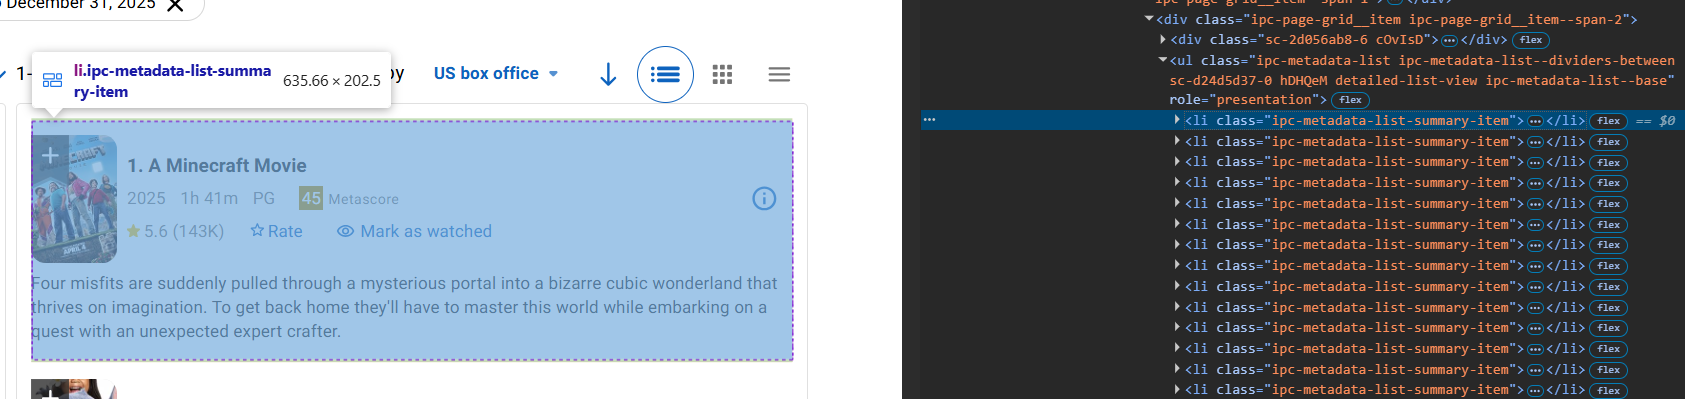

In [ ]:
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/117.0",
    "Accept-Language": "en-US,en;q=0.9",
    "Referer": "https://www.imdb.com/",
}
for url in urls:
    
    response = requests.get(url, headers=headers)
    print(response)

<Response [200]>


In [ ]:
print(response.encoding)

utf-8


In [ ]:
print(response.text)

<!DOCTYPE html><html lang="en-US" xmlns:og="http://opengraphprotocol.org/schema/" xmlns:fb="http://www.facebook.com/2008/fbml"><head><meta charSet="utf-8"/><meta name="viewport" content="width=device-width"/><script>if(typeof uet === 'function'){ uet('bb', 'LoadTitle', {wb: 1}); }</script><script>window.addEventListener('load', (event) => {
        if (typeof window.csa !== 'undefined' && typeof window.csa === 'function') {
            var csaLatencyPlugin = window.csa('Content', {
                element: {
                    slotId: 'LoadTitle',
                    type: 'service-call'
                }
            });
            csaLatencyPlugin('mark', 'clickToBodyBegin', 1763582787776);
        }
    })</script><title>Advanced search</title><meta name="description" content="" data-id="main"/><meta name="google-site-verification" content="0cadf7898134e79b"/><meta name="msvalidate.01" content="C1DACEF2769068C0B0D2687C9E5105FA"/><meta name="robots" content="max-image-preview:large"

In [ ]:
soup = BeautifulSoup(response.text)
print(soup)

<!DOCTYPE html>
<html lang="en-US" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/"><head><meta charset="utf-8"/><meta content="width=device-width" name="viewport"/><script>if(typeof uet === 'function'){ uet('bb', 'LoadTitle', {wb: 1}); }</script><script>window.addEventListener('load', (event) => {
        if (typeof window.csa !== 'undefined' && typeof window.csa === 'function') {
            var csaLatencyPlugin = window.csa('Content', {
                element: {
                    slotId: 'LoadTitle',
                    type: 'service-call'
                }
            });
            csaLatencyPlugin('mark', 'clickToBodyBegin', 1763582787776);
        }
    })</script><title>Advanced search</title><meta content="" data-id="main" name="description"/><meta content="0cadf7898134e79b" name="google-site-verification"/><meta content="C1DACEF2769068C0B0D2687C9E5105FA" name="msvalidate.01"/><meta content="max-image-preview:large" name="robots

In [ ]:
print(soup)